# Classification on SVHN dataset using Neural networks
By Sandesh Balyan

# Description of Dataset
The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

# Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. We will try to acheive the said objective with following steps

1. Load Dataset
2. Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
3. Data fetching and understand the train/val/test splits
4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)
5. Implement batch normalization for training the neural network
6. Print the classification accuracy metrics 

# Table of content

1. Data Preprocessing
2. Building Model
3. Training Models
4. Performance of model

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import keras
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
%matplotlib inline
import random
random.seed(0)
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing

## 1.1 Importing dataset

In [4]:
#open the file as readonly
data = h5py.File('/content/gdrive/My Drive/SVHN_single_grey1.h5','r')

In [5]:
data.items()

ItemsViewHDF5(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)

## 1.1 Splitting into Train, test and Validation dataset**




In [6]:
# breaking up into train, test and validation
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]



## 1.2 Shapes of Each dataset

In [7]:
print('Train dataset input shape {0}'.format(X_train.shape))
print('Train dataset output shape {0}'.format(y_train.shape))
print('Test dataset input shape {0}'.format(X_test.shape))
print('Test dataset output shape {0}'.format(y_test.shape))


Train dataset input shape (42000, 32, 32)
Train dataset output shape (42000,)
Test dataset input shape (18000, 32, 32)
Test dataset output shape (18000,)


1. Dataset has each image as 32x32 pixels
2. Training dataset has 42000 images
3. Test dataset has 18000 images



## 1.3 Labels in each dataset

1. There are 10 labels in each dataset
2. Labels range from 0 to 9

## 1.4 Reshaping the dataset

<Notes pending>

In [8]:
X_train = X_train.reshape(42000,1024)
X_test = X_test.reshape(18000,1024)

print(X_train.shape)
print(X_test.shape)


(42000, 1024)
(18000, 1024)


In [9]:
print('Training dataset no of pixels: Max:{0:.2f} and Min:{1}'.format(X_train.max(),X_train.min()))
print('Test dataset no of pixels: Max:{0:.2f} and Min:{1}'.format(X_test.max(),X_test.min()))


Training dataset no of pixels: Max:254.97 and Min:0.0
Test dataset no of pixels: Max:254.97 and Min:0.0


1. In all datasets, maximum value of pixel are 254.97 ~ 255 and minumum is zero

2. In further steps we will scale the pixels to normalise them between 0 and 1

## 1.5 Visualising dataset with an Example

Label :[2 6 7 4 4 0 3 0 7 3]


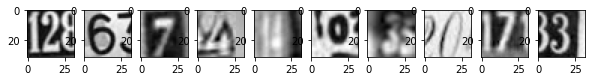

In [10]:
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i].reshape(32,32),cmap='gray')

print('Label :{}'.format(y_train[0:10]))



1. Most of the numbers are 2 or 3 digit numbers.
2. Some images are too hazy and are difficult to comprehend
3. Backgrounds of the images are also variable. Some are dark while others are light

## 1.6 Scaling dataset
As seen in section 1.4 max and min pixels in each dataset are 255 and 0 respectively.
We would like to normalise the dataset before feeding to Neural network.
This can be achieved by a simple division by 255

In [11]:
X_train_scaled = X_train /255
X_test_scaled = X_test /255



# checking max and min in each dataset again
print('Training dataset no of pixels: Max:{0:.2f} and Min:{1}'.format(X_train_scaled.max(),X_train_scaled.min()))
print('Test dataset no of pixels: Max:{0:.2f} and Min:{1}'.format(X_test_scaled.max(),X_test_scaled.min()))


Training dataset no of pixels: Max:1.00 and Min:0.0
Test dataset no of pixels: Max:1.00 and Min:0.0


Now all our datapoints are normalised between 0 and 1

## 1.7 Converting output to One hot vectors
This will be helpful in calculating cross entropy loss when using softmax and cross entropy in the final output layer


In [12]:
y_train_oh = pd.get_dummies(y_train)
y_test_oh = pd.get_dummies(y_test)

In [13]:
y_train_oh.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [14]:
y_test_oh.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0


# 2. Building Network

In [15]:
#input_shape = X_test_scaled.shape[1]
hidden_neurons = 100
output_neurons = 10
def neural_network(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,),activation=activation))

  model.add(Dense(hidden_neurons,activation=activation))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [16]:
model = neural_network()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               102500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 113,610
Trainable params: 113,610
Non-trainable params: 0
_________________________________________________________________


## 2.1 Sanity Check #1

In [17]:
# check the loss is reasonable for an untrained network
model.fit(X_train_scaled,y_train_oh,epochs=1,batch_size=1000,verbose=1)

42/42 [==============================] - 0s 5ms/step - loss: 2.3058 - accuracy: 0.1161


##### Insights:
We can see that model is untrained and it generates an error of 2.3

There are 10 output classes and the model is correctly predicting 1 up on 10 times (1/10 = 0.1% approx) as it is untrained.

## 2.2 Sanity Check

In [19]:
# Next we will verify the architecture of the network
# To do this we will try to overfit a small subset of training dataset
model = neural_network()
X_train_sub = X_train_scaled[:20]
y_train_sub = y_train_oh[:20]
model.fit(X_train_sub,y_train_sub,batch_size=1000,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 2.4618 - accuracy: 0.1000
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1031 - accuracy: 0.3500
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 1.9293 - accuracy: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1.8420 - accuracy: 0.3000
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1.7830 - accuracy: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.7478 - accuracy: 0.3000
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 1.7052 - accuracy: 0.4500
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6603 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1.6100 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 1.5583 - accuracy: 0.5000
Epoch 11/500
1/1 [===========

#### Insights
1. We are able to overfit the model , hence out model architectire looks fine
2. accuracy is reached 100% at around 380th epoch using vanilla SGD and 35th epoch using Adam optimiser
3. Also loss is decreasing continously and is very small by 500th epoch

# 3. Training the Network

1. In this section we will build the model by varying various parameters like Batch size, epochs, weight initialisation, number of hidden layers, number of hidden neurons, learning rate for optimiser and dropout rates
2. Although  we can start with SGD however we will use only Adam optimiser
3. We will also try using L2 rgulariser




## 3.1 Simple model
1. Batch Size = 32,
2. Epochs=100,
3. Hidden layers = 2
4. Hidden Neurons = 100
5. Default weight initialisation

In [20]:
model = neural_network()
training = model.fit(X_train_scaled,y_train_oh,batch_size=32,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
1050/1050 [==============================] - 4s 4ms/step - loss: 2.2256 - accuracy: 0.1549 - val_loss: 2.0631 - val_accuracy: 0.2381
Epoch 2/100
1050/1050 [==============================] - 4s 3ms/step - loss: 2.0051 - accuracy: 0.2558 - val_loss: 1.9486 - val_accuracy: 0.2852
Epoch 3/100
1050/1050 [==============================] - 4s 3ms/step - loss: 1.9095 - accuracy: 0.2924 - val_loss: 1.8725 - val_accuracy: 0.3031
Epoch 4/100
1050/1050 [==============================] - 4s 3ms/step - loss: 1.8686 - accuracy: 0.3106 - val_loss: 1.8361 - val_accuracy: 0.3229
Epoch 5/100
1050/1050 [==============================] - 4s 3ms/step - loss: 1.8405 - accuracy: 0.3255 - val_loss: 1.8136 - val_accuracy: 0.3311
Epoch 6/100
1050/1050 [==============================] - 4s 3ms/step - loss: 1.7936 - accuracy: 0.3451 - val_loss: 1.7289 - val_accuracy: 0.3700
Epoch 7/100
1050/1050 [==============================] - 4s 3ms/step - loss: 1.6113 - accuracy: 0.4322 - val_loss: 1.5238 - val_ac

### 3.1.1 Mean train and validation accuracies

In [21]:
training_accuracy = np.mean(training.history['accuracy'])
val_accuracy = np.mean(training.history['val_accuracy'])
print(training_accuracy, val_accuracy)

0.5736413709819317 0.5693964298069477


### 3.1.2 Accuracy Train data vs validation data

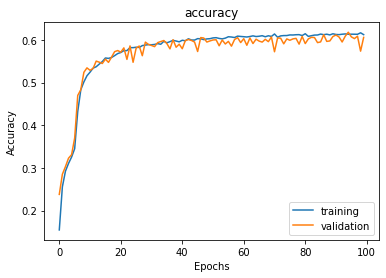

In [22]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.1.3 Accuracy on test dataset

In [23]:
results = model.evaluate(X_test_scaled,y_test_oh)
print('Accurcy on test set = {0:.4f}'.format(results[1]))

563/563 [==============================] - 2s 3ms/step - loss: 1.1912 - accuracy: 0.6123
Accurcy on test set = 0.6123


**Inisghts**

We tried to train simplest neural network with 1 input layer, 1 hidden layer with 100 neurons and 1 outpur layer with 10 neurons. a batch size of 32 and 100 epochs. Performance is very poor ,however,
remember that we didnot use batch normalisation and dropout layers also batch size and epochs are not optimised

1. Both validation and training accuracies are very low around 57%
2. Mean accuracy is also around 55 %
3. both flattens at around 40th epoch

## 3.2 Large Batch Size and Large Epoch

1. Batch Size = 1024,
2. Epochs=1000,
3. Hidden layers = 2
4. Hidden Neurons = 100
5. Default weight initialisation

In [24]:
model = neural_network()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=1000, validation_split=0.2)

Epoch 1/1000
33/33 [==============================] - 0s 12ms/step - loss: 2.3075 - accuracy: 0.1117 - val_loss: 2.2935 - val_accuracy: 0.1254
Epoch 2/1000
33/33 [==============================] - 0s 7ms/step - loss: 2.2782 - accuracy: 0.1495 - val_loss: 2.2515 - val_accuracy: 0.2074
Epoch 3/1000
33/33 [==============================] - 0s 8ms/step - loss: 2.2060 - accuracy: 0.2141 - val_loss: 2.1430 - val_accuracy: 0.2645
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 2.0687 - accuracy: 0.2967 - val_loss: 1.9709 - val_accuracy: 0.3506
Epoch 5/1000
33/33 [==============================] - 0s 7ms/step - loss: 1.8783 - accuracy: 0.3871 - val_loss: 1.7737 - val_accuracy: 0.4545
Epoch 6/1000
33/33 [==============================] - 0s 7ms/step - loss: 1.6814 - accuracy: 0.4824 - val_loss: 1.5978 - val_accuracy: 0.4876
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 1.5262 - accuracy: 0.5308 - val_loss: 1.4657 - val_accuracy: 0.5474
Epoch

### 3.2.1 Mean train and validation accuracies

In [25]:
training_accuracy2 = np.mean(training.history['accuracy'])
validation_accuracy2 = np.mean(training.history['val_accuracy'])
print(training_accuracy2, validation_accuracy2)

0.8750603877305985 0.8120950002521277


### 3.2.2 Accuracy Train data vs validation data

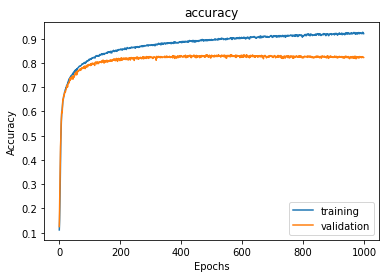

In [26]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.2.3 Loss Train data vs validation data

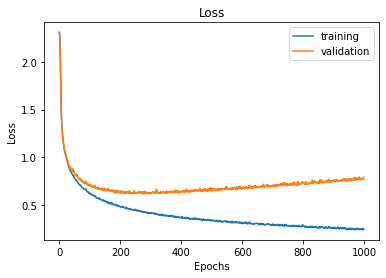

In [27]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.2.4 Accuracy on test dataset

In [28]:
results = model.evaluate(X_test_scaled,y_test_oh)
print('Accurcy on test set = {0:.4f}'.format(results[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.8100 - accuracy: 0.8229
Accurcy on test set = 0.8229


**Insights**:

1. Validaiton accuracy flattens at around 100th epoch much before training set accuracy
2. As number of epochs increases gap between training set accuracy and validaiton set accuracy increases , hence model starts to overfit on training data
3. There is very slight increase in the training set accuracy beyond 200th epoch
4. Mean training accuracy is 86% and mean validation accuracy is approx 80%
5. Increasing the number of batches to 1024 has been good for the models, but we can assume that this high number if epochs are unnecessry
We will explore more  during hyperparameter tuning

## 3.3 Large Hidden Neurons
Large hidden neurons=500 in each HL, Batch size=1024, Epochs =100

1. Batch Size = 1024,
2. Epochs=100,
3. Hidden layers = 2
4. Hidden Neurons = 500.
5. Default weight initialisation

Hidden neurons chosen by thumb rule (input+output) /2 ~ 500 in our case
we will divide these in 2 hidden layers of 250 each

In [29]:
hidden_neurons = 500
output_neurons = 10
def neural_network2(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,),activation=activation))

  model.add(Dense(hidden_neurons,activation=activation))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [30]:
model = neural_network2()
training = model.fit(X_train_scaled, y_train_oh,validation_split=0.2, batch_size=1024, epochs=100)

Epoch 1/100
33/33 [==============================] - 0s 15ms/step - loss: 2.3357 - accuracy: 0.1122 - val_loss: 2.2813 - val_accuracy: 0.1755
Epoch 2/100
33/33 [==============================] - 0s 11ms/step - loss: 2.2151 - accuracy: 0.2420 - val_loss: 2.1115 - val_accuracy: 0.3067
Epoch 3/100
33/33 [==============================] - 0s 10ms/step - loss: 1.9290 - accuracy: 0.3801 - val_loss: 1.7405 - val_accuracy: 0.4455
Epoch 4/100
33/33 [==============================] - 0s 10ms/step - loss: 1.6057 - accuracy: 0.4969 - val_loss: 1.4977 - val_accuracy: 0.5393
Epoch 5/100
33/33 [==============================] - 0s 11ms/step - loss: 1.4192 - accuracy: 0.5612 - val_loss: 1.3569 - val_accuracy: 0.5685
Epoch 6/100
33/33 [==============================] - 0s 10ms/step - loss: 1.2865 - accuracy: 0.6099 - val_loss: 1.2642 - val_accuracy: 0.6077
Epoch 7/100
33/33 [==============================] - 0s 10ms/step - loss: 1.1951 - accuracy: 0.6408 - val_loss: 1.1979 - val_accuracy: 0.6292
Epoch 

### 3.3.1 Accuracy Train data vs validation data

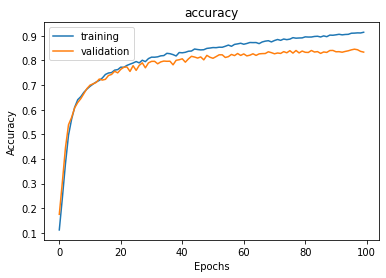

In [31]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.3.2 Loss train data vs validation data

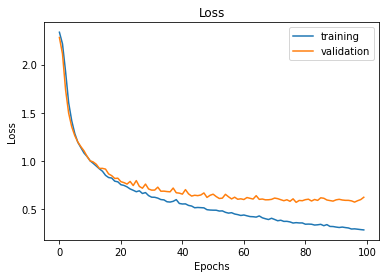

In [32]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.3.3 Accuracy on test dataset

In [33]:
results = model.evaluate(X_test_scaled,y_test_oh)
print('Accurcy on test set = {0:.4f}'.format(results[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.6351 - accuracy: 0.8292
Accurcy on test set = 0.8292


**Insights**

1. Train accuracy has incresed to 89% and validation accurcy to 83%
2. Validation accuracy and loss has flattened by 100th epoch, training accuracy is still increasing @ 100th epoch
3. Test Accuracy is around 83%

This is considerable improvement

Batch size = 1024
Epochs = 100
hidden neurons = 500 and 2 hidden layers

## 3.4 Weight Initialisation

1. Batch Size = 1024,
2. Epochs=100,
3. Hidden layers = 2
4. Hidden Neurons = 500.
5. Weight initialisation = he_normal
6. Optimizer = Adam(lr = 0.001)

In [34]:
hidden_neurons = 500
output_neurons = 10
def neural_network3(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,),activation=activation,kernel_initializer='he_normal'))

  model.add(Dense(hidden_neurons,activation=activation,kernel_initializer='he_normal'))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [35]:
model = neural_network3()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=100, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 0s 15ms/step - loss: 2.3769 - accuracy: 0.1120 - val_loss: 2.2865 - val_accuracy: 0.1417
Epoch 2/100
33/33 [==============================] - 0s 10ms/step - loss: 2.2436 - accuracy: 0.1898 - val_loss: 2.1723 - val_accuracy: 0.2518
Epoch 3/100
33/33 [==============================] - 0s 10ms/step - loss: 2.0455 - accuracy: 0.3368 - val_loss: 1.8787 - val_accuracy: 0.3990
Epoch 4/100
33/33 [==============================] - 0s 10ms/step - loss: 1.7287 - accuracy: 0.4540 - val_loss: 1.5729 - val_accuracy: 0.5198
Epoch 5/100
33/33 [==============================] - 0s 10ms/step - loss: 1.4844 - accuracy: 0.5394 - val_loss: 1.3900 - val_accuracy: 0.5833
Epoch 6/100
33/33 [==============================] - 0s 10ms/step - loss: 1.3336 - accuracy: 0.5936 - val_loss: 1.2873 - val_accuracy: 0.6035
Epoch 7/100
33/33 [==============================] - 0s 10ms/step - loss: 1.2164 - accuracy: 0.6326 - val_loss: 1.1721 - val_accuracy: 0.6492
Epoch 

### 3.4.1 Accuracy Train data vs validation data

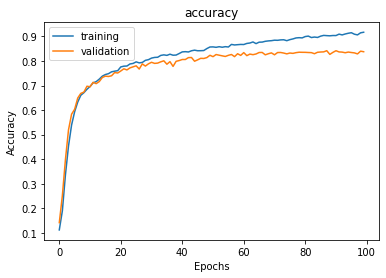

In [36]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.4.2 Loss train vs validation

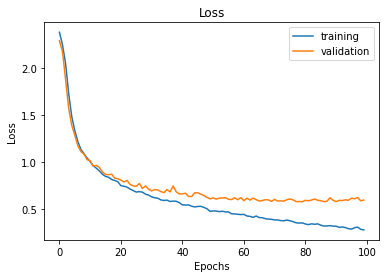

In [37]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.4.5 Accuracy on test dataset

In [38]:
results = model.evaluate(X_test_scaled,y_test_oh)
print('Accurcy on test set = {0:.4f}'.format(results[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.5992 - accuracy: 0.8424
Accurcy on test set = 0.8424


**Inisghts**

1. Marginal decrease in test accuracy
2. not much improvement in training(91%) and validation accuracy(83%)
3. Test Accuracy is 84.24%
4. We will continue with defult - glorot_uniform weight initialisation as it yeilded better results

## 3.5 Batch Normalisation

In this section we will introduce batch normalisation to above neural network to further boost performance of network

1. Batch Size = 1024,
2. Epochs=100,
3. Hidden layers = 2
4. Hidden Neurons = 500.
5. Weight initialisation = Default - glorot_uniform
6. Optimizer = Adam(lr = 0.001)
7. Batch Normalisation = included after each hidden layer before activation

In [50]:
hidden_neurons = 500
output_neurons = 10
def neural_network4(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [51]:
model = neural_network4()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=100, validation_split=0.2)


Epoch 1/100
33/33 [==============================] - 1s 18ms/step - loss: 1.5647 - accuracy: 0.4981 - val_loss: 2.1154 - val_accuracy: 0.2637
Epoch 2/100
33/33 [==============================] - 0s 13ms/step - loss: 0.9175 - accuracy: 0.7241 - val_loss: 1.8458 - val_accuracy: 0.4879
Epoch 3/100
33/33 [==============================] - 0s 12ms/step - loss: 0.7528 - accuracy: 0.7693 - val_loss: 1.6206 - val_accuracy: 0.5362
Epoch 4/100
33/33 [==============================] - 0s 12ms/step - loss: 0.6456 - accuracy: 0.8041 - val_loss: 1.3781 - val_accuracy: 0.6311
Epoch 5/100
33/33 [==============================] - 0s 13ms/step - loss: 0.5721 - accuracy: 0.8281 - val_loss: 1.2911 - val_accuracy: 0.5867
Epoch 6/100
33/33 [==============================] - 0s 13ms/step - loss: 0.5187 - accuracy: 0.8436 - val_loss: 1.1417 - val_accuracy: 0.6423
Epoch 7/100
33/33 [==============================] - 0s 12ms/step - loss: 0.4738 - accuracy: 0.8574 - val_loss: 1.8743 - val_accuracy: 0.3980
Epoch 

### 3.5.1 Accuracy train vs validation

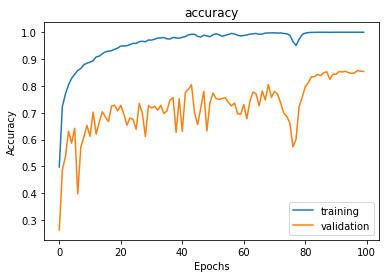

In [52]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.5.2 Loss Train vs validation

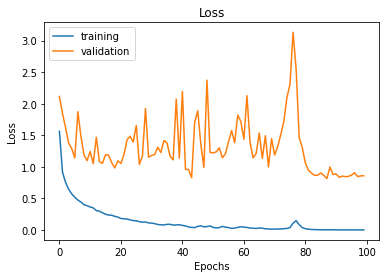

In [53]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.5.3 Accuracy on test dataset

In [54]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 3ms/step - loss: 0.8550 - accuracy: 0.8564


0.8564444184303284

**Insights**

1. Validation accuracy is very far from training accuracy. Model might be overfitting, however it performs well on test dataset
2. Test accuracy comes close to 85.64%
3. Train accuracy reaches 100%
4. Slight overfitting but still considerable improvement in performance

## 3.6 Increasing hiden layers

1. Batch Size = 1024,
2. Epochs=200,
3. Hidden layers = 5
4. Hidden Neurons = 500.
5. Weight initialisation = Default - glorot_uniform
6. Optimizer = Adam(lr = 0.001)
7. Batch Normalisation = included after each hidden layer before activation

In [55]:
hidden_neurons = 500
output_neurons = 10
def neural_network5(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [56]:
model = neural_network5()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=200, validation_split=0.2)

Epoch 1/200
33/33 [==============================] - 1s 28ms/step - loss: 1.4864 - accuracy: 0.5060 - val_loss: 2.2745 - val_accuracy: 0.1706
Epoch 2/200
33/33 [==============================] - 1s 19ms/step - loss: 0.8366 - accuracy: 0.7324 - val_loss: 1.9422 - val_accuracy: 0.4088
Epoch 3/200
33/33 [==============================] - 1s 17ms/step - loss: 0.6578 - accuracy: 0.7898 - val_loss: 1.8014 - val_accuracy: 0.3790
Epoch 4/200
33/33 [==============================] - 1s 17ms/step - loss: 0.5386 - accuracy: 0.8280 - val_loss: 1.4733 - val_accuracy: 0.5169
Epoch 5/200
33/33 [==============================] - 1s 17ms/step - loss: 0.4524 - accuracy: 0.8571 - val_loss: 1.4088 - val_accuracy: 0.5345
Epoch 6/200
33/33 [==============================] - 1s 17ms/step - loss: 0.3947 - accuracy: 0.8753 - val_loss: 1.2376 - val_accuracy: 0.5780
Epoch 7/200
33/33 [==============================] - 1s 17ms/step - loss: 0.3392 - accuracy: 0.8917 - val_loss: 1.1047 - val_accuracy: 0.6450
Epoch 

### 3.6.1 Accuracy Train vs validation

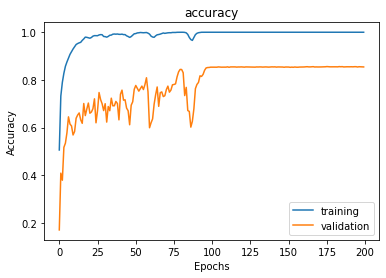

In [57]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.6.2 Loss Train vs validation

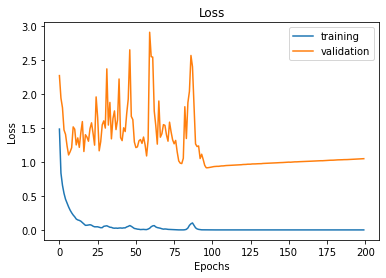

In [58]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.6.3 Accuracy on test dataset

In [59]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 4ms/step - loss: 1.0404 - accuracy: 0.8533


0.8533333539962769

**Insights**

1. No Increase in test accuracy
2. there is a slight increase in train and validation accuracy
3. From loss plot, validation loss is minimum somewhere around 75th epoch post which it starts to increase. hence there is increasing epochs from 100 to 200 is not viable
4. Train accuracy is 100% and test accuracy is 85.33%

## 3.7 L2 regularizer

L2 regulariser will be added to each hidden layer to avoid overfitting.

1. Batch Size = 1024,
2. Epochs=100,
3. Hidden layers = 5
4. Hidden Neurons = 500.
5. Weight initialisation = Default - glorot_uniform
6. Optimizer = Adam(lr = 0.001)
7. Batch Normalisation = included after each hidden layer before activation
8. Regulariser: L2 lambda=0.0001


In [60]:

hidden_neurons = 500
output_neurons = 10
def neural_network6(activation='relu',optimiser='Adam',dropout_rate=0):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,),kernel_regularizer=regularizers.l2(l2=0.0001)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons,kernel_regularizer=regularizers.l2(l2=0.0001)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons,kernel_regularizer=regularizers.l2(l2=0.0001)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons,kernel_regularizer=regularizers.l2(l2=0.0001)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(hidden_neurons,kernel_regularizer=regularizers.l2(l2=0.0001)))
  model.add(BatchNormalization())
  model.add(Activation(activation))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [61]:
model = neural_network6()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=100, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 1s 30ms/step - loss: 1.7744 - accuracy: 0.5005 - val_loss: 2.5330 - val_accuracy: 0.1386
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: 1.1110 - accuracy: 0.7310 - val_loss: 2.2011 - val_accuracy: 0.4124
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 0.9416 - accuracy: 0.7850 - val_loss: 2.1343 - val_accuracy: 0.3508
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 0.8206 - accuracy: 0.8236 - val_loss: 1.9165 - val_accuracy: 0.4179
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: 0.7290 - accuracy: 0.8534 - val_loss: 1.6583 - val_accuracy: 0.5308
Epoch 6/100
33/33 [==============================] - 1s 18ms/step - loss: 0.6739 - accuracy: 0.8692 - val_loss: 1.9714 - val_accuracy: 0.4338
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: 0.6180 - accuracy: 0.8883 - val_loss: 1.6039 - val_accuracy: 0.5467
Epoch 

### 3.7.1 Accuracy Train vs validation

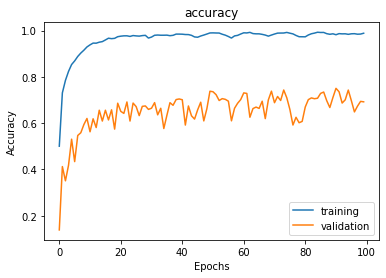

In [62]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.7.2 Loss Train vs validation

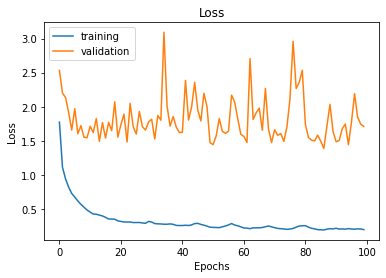

In [63]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.7.3 Accuracy on test dataset

In [64]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 4ms/step - loss: 1.6835 - accuracy: 0.6978


0.6977777481079102

**Insights**

1. Considerable drop in test and validaiton accuracy
2. Train accuracy is still quite high. there is very high overfitting
3. :L2 regulariser has not yielded good improvement

PS: I used different values for lamda(not shown here) but there was no overall benifit


## 3.8 Dropouts

1. Batch Size = 1024,
2. Epochs=100,
3. Hidden layers = 5
4. Hidden Neurons = 500.
5. Weight initialisation = Default - glorot_uniform
6. Optimizer = Adam(lr = 0.001)
7. Batch Normalisation = included after each hidden layer before activation
8. Droput rate: 20% and 50%

In [65]:
hidden_neurons = 500
output_neurons = 10
def neural_network7(activation='relu',optimiser='Adam',dropout_rate=0.2):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,)))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))


  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(output_neurons,activation='softmax'))


  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [66]:
model = neural_network7()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=100, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 1s 29ms/step - loss: 2.2023 - accuracy: 0.2349 - val_loss: 2.2874 - val_accuracy: 0.1470
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: 1.4078 - accuracy: 0.5213 - val_loss: 1.7949 - val_accuracy: 0.4618
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 1.1027 - accuracy: 0.6435 - val_loss: 1.3389 - val_accuracy: 0.6213
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 0.9489 - accuracy: 0.6941 - val_loss: 1.1413 - val_accuracy: 0.6408
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: 0.8661 - accuracy: 0.7200 - val_loss: 1.1342 - val_accuracy: 0.6367
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: 0.8082 - accuracy: 0.7409 - val_loss: 1.0333 - val_accuracy: 0.6683
Epoch 7/100
33/33 [==============================] - 1s 19ms/step - loss: 0.7632 - accuracy: 0.7539 - val_loss: 1.3650 - val_accuracy: 0.5627
Epoch 

### 3.8.1 Accuracy Train vs validation

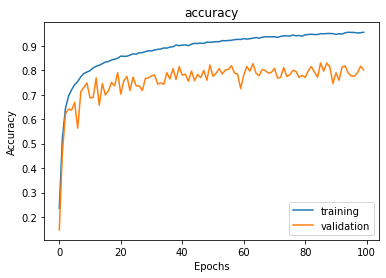

In [67]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.8.2 Loss Train vs validation

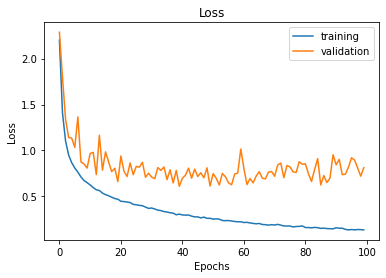

In [68]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.8.3 Mean train and validation accuracies

In [69]:
training_accuracy = np.mean(training.history['accuracy'])
validation_accuracy = np.mean(training.history['val_accuracy'])
print(training_accuracy, validation_accuracy)

0.8852029751241207 0.7572440497577191


### 3.8.4 Accuracy on test dataset

In [70]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 4ms/step - loss: 0.8514 - accuracy: 0.7969


0.7969444394111633

Insights


1. Overfitting has reduced as train, validation and test accuracies are nearby ranges
2. However, there is considerable drop in overall test accuracy from 85% to 79%.

(PS: Other values were also tried but there was no significant improvement)

## 3.9 Learning rate
In this section we will try to change the learning rate of the optimizer

In [113]:
hidden_neurons = 500
output_neurons = 10
def neural_network8(activation='relu',optimiser='Adam',dropout_rate=0.5):
  model = Sequential()
  
  model.add(Dense(hidden_neurons,input_shape=(1024,)))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(hidden_neurons))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(dropout_rate))

  model.add(Dense(output_neurons,activation='softmax'))

  optimiser = keras.optimizers.Adam(0.001)
  #compiling the model
  model.compile(loss='categorical_crossentropy', optimizer=optimiser,metrics=['accuracy'])
  return model

In [114]:
model = neural_network8()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 1s 19ms/step - loss: 2.4340 - accuracy: 0.2037 - val_loss: 2.2031 - val_accuracy: 0.2342
Epoch 2/100
33/33 [==============================] - 0s 14ms/step - loss: 1.7118 - accuracy: 0.4144 - val_loss: 1.8755 - val_accuracy: 0.4708
Epoch 3/100
33/33 [==============================] - 0s 13ms/step - loss: 1.3698 - accuracy: 0.5431 - val_loss: 1.6494 - val_accuracy: 0.5315
Epoch 4/100
33/33 [==============================] - 0s 13ms/step - loss: 1.2021 - accuracy: 0.6117 - val_loss: 1.4678 - val_accuracy: 0.5915
Epoch 5/100
33/33 [==============================] - 0s 13ms/step - loss: 1.1084 - accuracy: 0.6456 - val_loss: 1.3985 - val_accuracy: 0.5823
Epoch 6/100
33/33 [==============================] - 0s 13ms/step - loss: 1.0418 - accuracy: 0.6676 - val_loss: 1.2300 - val_accuracy: 0.6563
Epoch 7/100
33/33 [==============================] - 0s 13ms/step - loss: 0.9931 - accuracy: 0.6865 - val_loss: 1.1475 - val_accuracy: 0.6674
Epoch 

### 3.9.1 Accuracy train vs validation

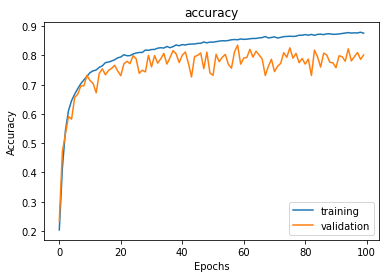

In [115]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training','validation'])

### 3.9.2 Loss train vs validation

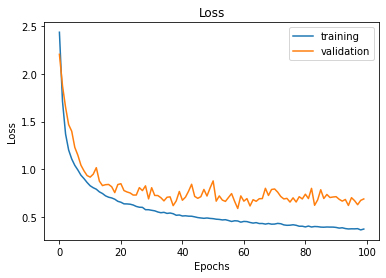

In [116]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training','validation'])

### 3.9.3 Accuracy on train dataset

In [117]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 3ms/step - loss: 0.7027 - accuracy: 0.7963


0.7962777614593506

### 3.9.4 Changing epochs for this learning rate lr=0.001

In [119]:
model = neural_network8()
training = model.fit(X_train_scaled,y_train_oh,batch_size=1024,epochs=150,verbose=1,validation_split=0.2)

Epoch 1/150
33/33 [==============================] - 1s 19ms/step - loss: 2.4587 - accuracy: 0.1999 - val_loss: 2.1997 - val_accuracy: 0.1981
Epoch 2/150
33/33 [==============================] - 0s 14ms/step - loss: 1.7343 - accuracy: 0.4101 - val_loss: 1.8717 - val_accuracy: 0.5099
Epoch 3/150
33/33 [==============================] - 0s 13ms/step - loss: 1.3878 - accuracy: 0.5378 - val_loss: 1.6322 - val_accuracy: 0.5607
Epoch 4/150
33/33 [==============================] - 0s 13ms/step - loss: 1.2224 - accuracy: 0.6036 - val_loss: 1.4679 - val_accuracy: 0.6165
Epoch 5/150
33/33 [==============================] - 0s 13ms/step - loss: 1.1316 - accuracy: 0.6395 - val_loss: 1.3640 - val_accuracy: 0.6176
Epoch 6/150
33/33 [==============================] - 0s 13ms/step - loss: 1.0537 - accuracy: 0.6640 - val_loss: 1.1938 - val_accuracy: 0.6752
Epoch 7/150
33/33 [==============================] - 0s 13ms/step - loss: 1.0003 - accuracy: 0.6835 - val_loss: 1.1973 - val_accuracy: 0.6461
Epoch 

### 3.9.5 Accuracy on test dataset for 150 epochs lr=0.001

In [120]:
results = model.evaluate(X_test_scaled,y_test_oh)
results[1]

563/563 [==============================] - 2s 3ms/step - loss: 0.6329 - accuracy: 0.8076


0.8076111078262329

**Consolidated Insights**
1. models that perform best are neural_network4, neural_network5 and neural_network8

2. neural_network4

  2.1 train accuracy: 99.9%

  2.2 test accuracy: 85.6%

  2.3 parameters: 

      1. Batch Size = 1024,
      2. Epochs=100,
      3. Hidden layers = 2
      4. Hidden Neurons = 500.
      5. Weight initialisation = Default - glorot_uniform
      6. Optimizer = Adam(lr = 0.001)
      7. Batch Normalisation = included after each hidden layer before activation

3. neural_network5

  3.1 train accuracy: 100%

  3.2 test accuracy: 85.03%

  3.3 parameters:

      1. Batch Size = 1024,
      2. Epochs=100,
      3. Hidden layers = 5
      4. Hidden Neurons = 500.
      5. Weight initialisation = Default - glorot_uniform
      6. Optimizer = Adam(lr = 0.001)
      7. Batch Normalisation = included after each hidden layer before activation

4. neural_network8:

  4.1 train accuracy: 89.08%

  4.2 test accuracy: 80.7%

  4.3 parameters:

      1. Batch Size = 1024,
      2. Epochs=150,
      3. Hidden layers = 2
      4. Hidden Neurons = 500.
      5. Weight initialisation = Default - glorot_uniform
      6. Optimizer = Adam(lr = 0.001)
      7. Batch Normalisation = included after each hidden layer before activation

5. L2 regularizer in each layer drops the accuracies considerbly
6. Dropouts seems to reduce overfitting but reduces accuracies a lot
7. model 4 and 8 are exactly the same except for number of epochs, but still has different performances.

**Finally, Although there is some amount of overfitting  we can select model 'neural_network5' as it has higher accuracies in train and test dataset. lesser overfitting because train and test accuracies are closer.**




# 4 Performance of model

1. Train and test accuracies
2. Classification report
3. Confusion matrix
4. AUC

In [121]:
final_model = neural_network5()
training = final_model.fit(X_train_scaled,y_train_oh,batch_size=1024, epochs=100, validation_split=0.2)

Epoch 1/100
33/33 [==============================] - 1s 29ms/step - loss: 1.4629 - accuracy: 0.5135 - val_loss: 2.2174 - val_accuracy: 0.2235
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: 0.8211 - accuracy: 0.7376 - val_loss: 1.9188 - val_accuracy: 0.4455
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 0.6410 - accuracy: 0.7943 - val_loss: 1.5613 - val_accuracy: 0.5406
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 0.5328 - accuracy: 0.8300 - val_loss: 1.5826 - val_accuracy: 0.4823
Epoch 5/100
33/33 [==============================] - 1s 18ms/step - loss: 0.4616 - accuracy: 0.8527 - val_loss: 1.2183 - val_accuracy: 0.6205
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: 0.3974 - accuracy: 0.8734 - val_loss: 1.3757 - val_accuracy: 0.5364
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 0.3339 - accuracy: 0.8946 - val_loss: 1.4498 - val_accuracy: 0.5342
Epoch 

## 4.1 Accuracies and losses

In [123]:
results_test = final_model.evaluate(X_test_scaled,y_test_oh)
results_train = final_model.evaluate(X_train_scaled,y_train_oh)


1313/1313 [==============================] - 5s 4ms/step - loss: 0.1803 - accuracy: 0.9702


In [175]:
print('Accuracy on train set = {0:.2f}% and test set = {1:.2f}%'.format(results_train[1]*100,results_test[1]*100))
print('Loss on train set = {0:.4f} and test set = {1:.4f}'.format(results_train[0],results_test[0]))


Accuracy on train set = 97.02% and test set = 85.13%
Loss on train set = 0.1803 and test set = 0.8876


## 4.2 Classification report

In [142]:
y_pred = final_model.predict_classes(X_test_scaled)

In [148]:
print("Classification report for final selected model")
print(classification_report(y_test,y_pred))

Classification report for final selected model
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1814
           1       0.85      0.87      0.86      1828
           2       0.87      0.86      0.86      1803
           3       0.80      0.81      0.80      1719
           4       0.89      0.87      0.88      1812
           5       0.84      0.85      0.84      1768
           6       0.86      0.84      0.85      1832
           7       0.89      0.89      0.89      1808
           8       0.83      0.82      0.82      1812
           9       0.84      0.83      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



## 4.3 Confusion matrix

Text(0.5, 1.0, 'Confusion matrix for Selected classifier')

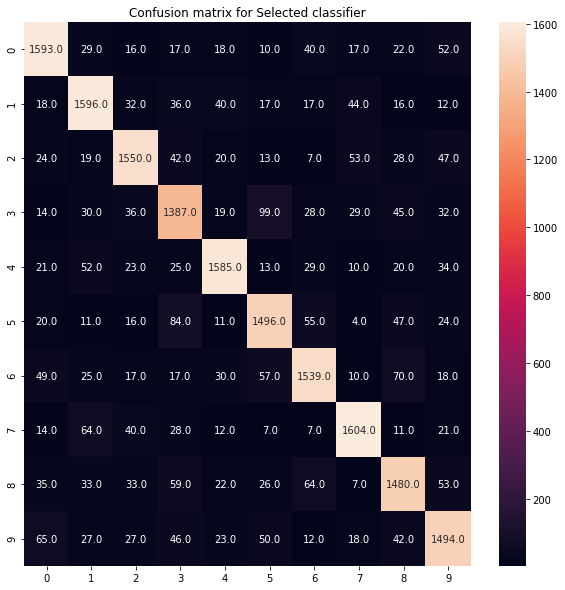

In [172]:
fig = plt.figure(1,(10,10))
labels = [0,1,2,3,4,5,6,7,8,9]
cm = pd.DataFrame(confusion_matrix(y_test,y_pred))
sns.heatmap(cm,fmt='.1f',annot=True,xticklabels=labels,yticklabels=labels)
plt.title('Confusion matrix for Selected classifier')

## 4.4 AUC ROC Scores

In [158]:
y_pred_prob = final_model.predict_proba(X_test_scaled)

Instructions for updating:
Please use `model.predict()` instead.


In [163]:
print("Area under the curve: {0:.2f}".format(roc_auc_score(y_test,y_pred_prob,multi_class='ovr')))

Area under the curve: 0.98


**Final Insights**
1. From classfication report precision recall and F1 scores are more than 80% for all the digits
2. Almost all digits have similar chances of getting classified i.e. bteween 80 and 90%
3. 7 has highest F1 score = 0.89
4. Area under the curve is 98% which is very high
5. Confusion matrix shows that although there are many misclassification of digits but still performance is good
6. Accuracy on train set = 97.02% and test set = 85.13%
7. Loss on train set = 0.18 and test set = 0.89

------------------------------------------------------End-----------------------------------------------